# Examples

## Conjugate gradients

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set()
from mpl_toolkits.mplot3d import Axes3D
import itertools

A = np.matrix([[3.0, 2.0], [2.0, 6.0]])
b = np.matrix([[2.0], [-8.0]])  # we will use the convention that a vector is a column vector
c = 0.0

def f(x, A, b, c):
    return float(0.5 * x.T * A * x - b.T * x + c)

def bowl(A, b, c):
    fig = plt.figure(figsize=(10,8))
    qf = fig.gca(projection='3d')
    size = 20
    x1 = list(np.linspace(-6, 6, size))
    x2 = list(np.linspace(-6, 6, size))
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]], [x2[i,j]]])
            zs[i,j] = f(x, A, b, c)
    qf.plot_surface(x1, x2, zs, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
#     fig.show()
    return x1, x2, zs

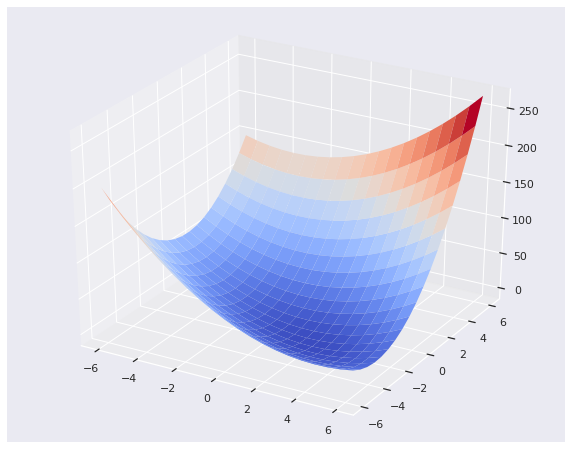

In [ ]:
x1, x2, zs = bowl(A, b, c)

In [ ]:
def contoursteps(x1, x2, zs, steps=None):
    fig = plt.figure(figsize=(6,6))
    cp = plt.contour(x1, x2, zs, 10)
    plt.clabel(cp, inline=1, fontsize=10)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0], steps[:,1], '-o')
#     fig.show()

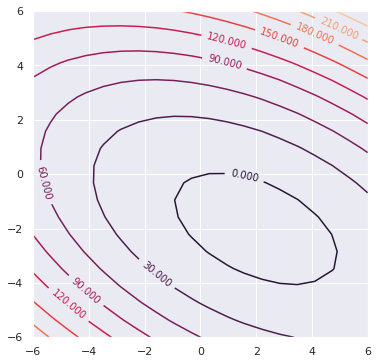

In [ ]:
contoursteps(x1, x2, zs)

In [ ]:
x = np.matrix([[-2.0],[-2.0]])
steps = [(-2.0, -2.0)]
i = 0
imax = 10
eps = 0.01
r = b - A * x
delta = r.T * r
delta0 = delta
while i < imax and delta > eps**2 * delta0:
    alpha = float(delta / (r.T * (A * r)))
    x = x + alpha * r
    steps.append((x[0,0], x[1,0]))  # store steps for future drawing
    r = b - A * x
    delta = r.T * r
    i += 1

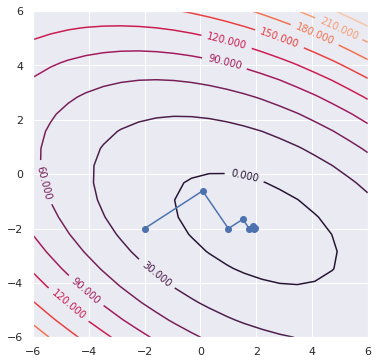

In [ ]:
contoursteps(x1, x2, zs, steps)

Let's take a look on a single iteration, especially on the residual $r_i = b - Ax_i$

b:
 [[ 2.]
 [-8.]]
A:
 [[3. 2.]
 [2. 6.]]
x:
 [[-2.]
 [-2.]]
r:
 [[12.]
 [ 8.]]


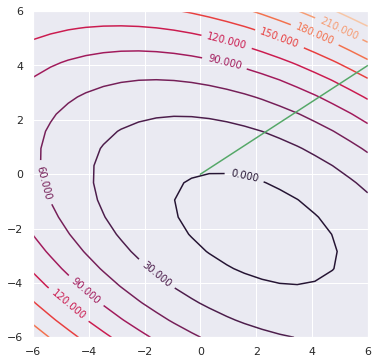

||r||^2 = 207.99999999999997
r.T * r =  [[208.]]


In [ ]:
x = np.matrix([[-2.0],[-2.0]])
steps = [(-2.0, -2.0)]
i = 0
imax = 10
eps = 0.01


print('b:\n', b)
print('A:\n', A)
print('x:\n', x)
r = b - A * x
print('r:\n', r)
contoursteps(x1, x2, zs, None)
plt.plot([0, r[0, 0] * 0.5], [0, r[1, 0] * 0.5], 'g')
plt.show()

print('||r||^2 =', np.linalg.norm(r)**2)
delta = r.T * r
print('r.T * r = ',  delta)
delta0 = delta

Note that this direction coincides with the direction of the step. Its length is chosen the best for our task.

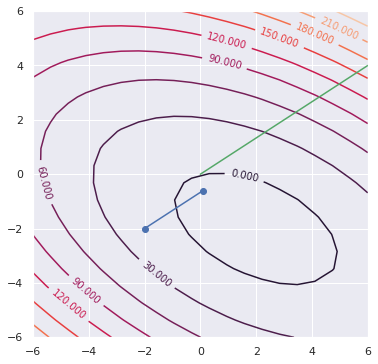

In [ ]:
alpha = float(delta / (r.T * A * r))
x = x + alpha * r
contoursteps(x1, x2, zs, [(-2, -2), (x[0, 0], x[1, 0])])
plt.plot([0, r[0, 0] * 0.5], [0, r[1, 0] * 0.5], 'g')
plt.show()

(-6.0, 6.0)

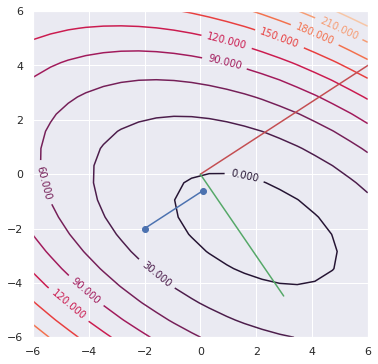

In [ ]:
r_new = b - A * x
contoursteps(x1, x2, zs, [(-2, -2), (x[0, 0], x[1, 0])])
plt.plot([0, r[0, 0]], [0, r[1, 0]], 'r')
plt.plot([0, r_new[0, 0]], [0, r_new[1, 0]], 'g')
plt.ylim(-6,6)
plt.xlim(-6,6)

In [ ]:
x = np.array([[-2], [2]]) # x0
steps = []
steps.append((x[0,0], x[1,0]))
i = 0
imax = 10000
eps = 0.01
alpha = 0.2  # play with this value to see how it affects the optimization process, try 0.05, 0.27 and 0.3
r = b - A * x
delta = r.T * r
delta0 = delta
while i < imax and delta > eps**2 * delta0:
    x = x + alpha * r
    steps.append((x[0,0], x[1,0]))  # store steps for future drawing
    r = b - A * x
    delta = r.T * r
    i += 1

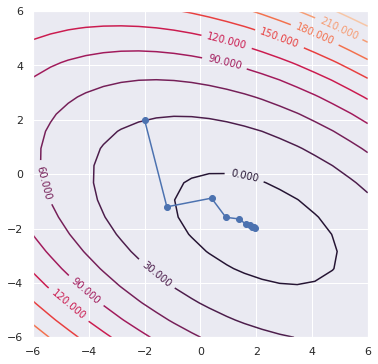

In [ ]:
contoursteps(x1, x2, zs, steps)

As it was shown above, the steepest descent makes many steps in the same directions, the idea of the conjugate direction method is to choose the right "orthogonal" directions in advance and walk on them once, but with the correct length of the step. Let us illustrate the concept of $A$ - conjugacy.

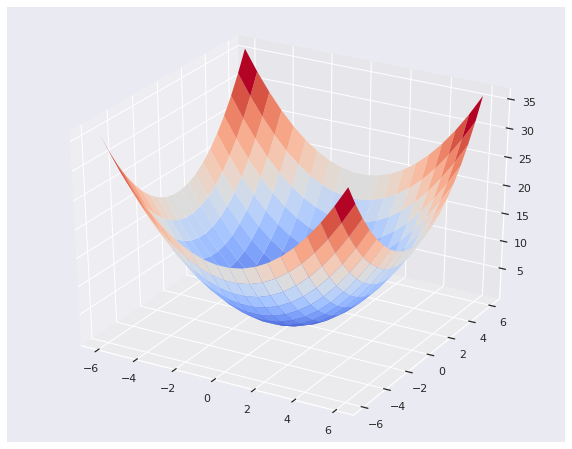

In [ ]:
Around = np.matrix([[1, 0],[0, 1]])
bround = np.matrix([[0],[0]])
cround = 0
x1, x2, zs = bowl(Around, bround, cround)

Let's plot some orthogonal vectors

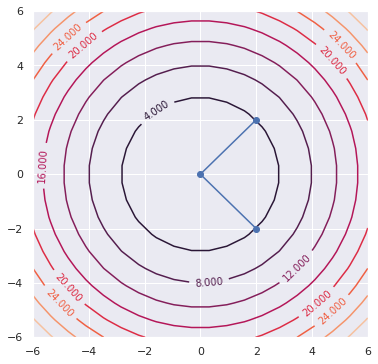

In [ ]:
va = np.matrix([[2],[2]])
vb = np.matrix([[2],[-2]])
contoursteps(x1, x2, zs, [(va[0,0],va[1,0]),(0,0),(vb[0,0],vb[1,0])])

Let's see what happens, if we'll scale one of the axes:

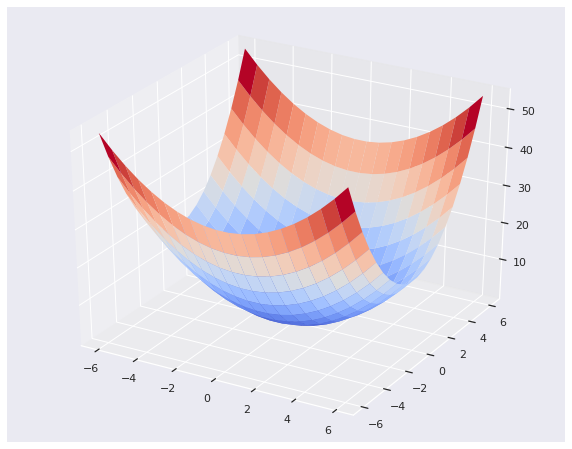

In [ ]:
Ascaled = np.matrix([[1, 0],[0, 2]])
bscaled = np.matrix([[0],[0]])
cscaled = 0
x1, x2, zs = bowl(Ascaled, bscaled, cscaled)

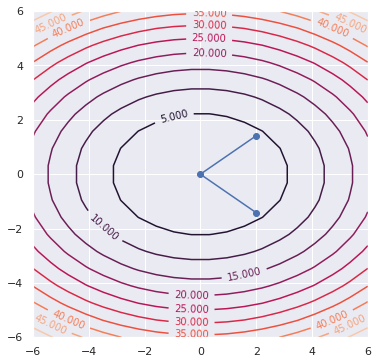

In [ ]:
va = np.matrix([[2],[np.sqrt(2)]])
vb = np.matrix([[2],[-np.sqrt(2)]])
contoursteps(x1, x2, zs, [(va[0,0],va[1,0]),(0,0),(vb[0,0],vb[1,0])])

These vectors are not orthogonal anymore:

In [ ]:
va.T@vb

matrix([[2.]])

But they are $A$ - orthogonal!


In [ ]:
va.T@Ascaled@vb

matrix([[-5.46864693e-16]])

Why does it matter? Let's look at an example of the steepest descent for an isotropic function:

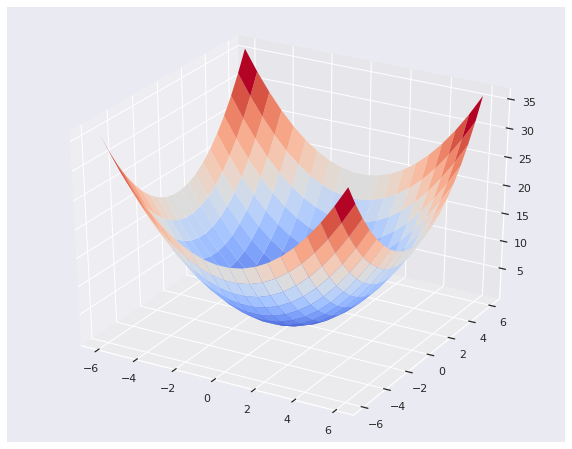

In [ ]:
Around = np.matrix([[1, 0],[0, 1]])
bround = np.matrix([[0],[0]])
cround = 0
x1, x2, zs = bowl(Around, bround, cround)

In [ ]:
x = np.array([[-2], [-2]]) # x0
steps = []
steps.append((x[0,0], x[1,0]))
i = 0
imax = 10
eps = 0.01
r = bround - np.matrix([[1, 0],[0, 0]]) * x  # replaced Around with this to force residual to be parallel to X axis
delta = r.T * r
delta0 = delta
while i < imax and delta > eps**2 * delta0:
    alpha = float(delta / (r.T * (Around * r)))
    x = x + alpha * r
    steps.append((x[0,0], x[1,0]))  # store steps for future drawing
    r = bround - Around * x
    delta = r.T * r
    i += 1

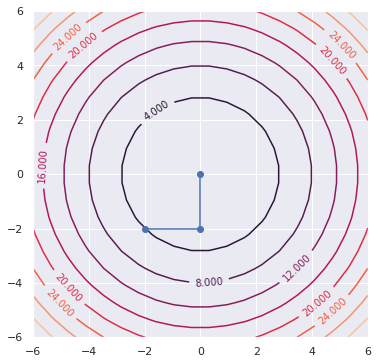

In [ ]:
contoursteps(x1, x2, zs, steps)

Just 2 steps! To implement this on an anisotropic square function, we need to take $n$ linearly independent vectors and orthogonalize (naturally, $A$ - orthogonalize) them like the Gram-Schmidt procedure of orthogonalization.

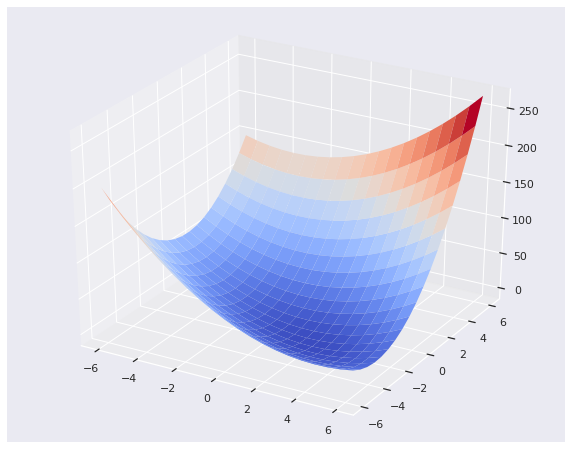

In [ ]:
x1, x2, zs = bowl(A, b, c)

In [ ]:
x = np.array([[-2], [2]]) # x0
steps = []
steps.append((x[0,0], x[1,0]))
i = 0
imax = 10
eps = 0.01
r = b - A * x
d = r
deltanew = r.T * r
delta0 = deltanew
while i < imax and deltanew > eps**2 * delta0:
    alpha = float(deltanew / float(d.T * (A * d)))
    x = x + alpha * d
    steps.append((x[0, 0], x[1, 0]))
    r = b - A * x
    deltaold = deltanew
    deltanew = r.T * r
    #beta = -float((r.T * A * d) / float(d.T * A * d))
    beta = float(deltanew / float(deltaold))
    d = r + beta * d
    i += 1

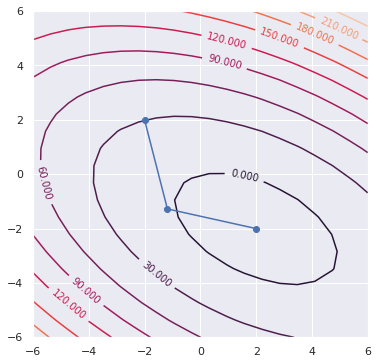

In [ ]:
contoursteps(x1, x2, zs, steps)

## Newton method

In [ ]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
sns.set()
plt.rcParams["animation.html"] = "html5"
from pylab import rcParams
rcParams['figure.figsize'] = 13, 7
import numpy as np


x_min, x_max = -1, 1
y_min, y_max = 0, 2
N_iter = 20
x_0 = 1

fig, ax = plt.subplots()
xdata = np.linspace(x_min,x_max)
ydata = xdata**4
plt.plot(xdata, ydata)
plt.xlabel(f'$x$')
plt.ylabel(f'$f(x) = x^4$')
line, = ax.plot([], [], marker='o', linestyle='-', color='r', label='Newton', lw=2)
plt.legend()
# ax.grid()
xdata, ydata = [x_0], [x_0**4]

def data_gen(t=0):
    cnt = 0
    x = x_0
    while cnt < N_iter:
        cnt += 1
        x = 2/3*x
        yield x

def init():
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    line.set_data(xdata, ydata)
    return line,

def run(data):
    # update the data
    x = data
    y = x**4
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,

ani = matplotlib.animation.FuncAnimation(fig, run, data_gen, blit=False, interval=1000,
                              repeat=True, init_func=init)

In [ ]:
ani

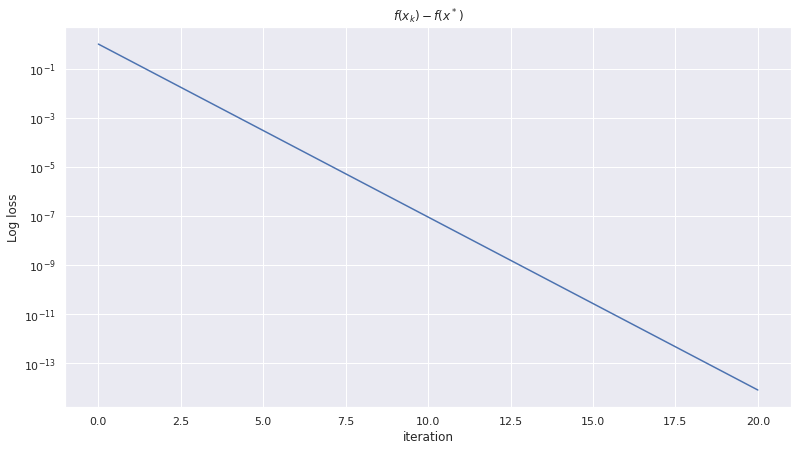

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 7
plt.semilogy(ydata)
plt.title(f'$f(x_k) - f(x^*)$')
plt.xlabel('iteration')
plt.ylabel('Log loss')
plt.show()

In [ ]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
plt.rcParams["animation.html"] = "html5"
from pylab import rcParams
rcParams['figure.figsize'] = 13, 7
import numpy as np

x_min, x_max = -3, 3
y_min, y_max = 1, 3
N_iter = 4
x_0 = 0.9



fig, ax = plt.subplots()
xdata = np.linspace(x_min,x_max)
ydata = np.sqrt(1 + xdata**2)
plt.plot(xdata, ydata)
plt.title(r'Newton method convergence for  $y = \sqrt{1 + x^2}$')
plt.xlabel(f'$x$')
plt.ylabel(f'$f(x)$')
line, = ax.plot([], [], marker='o', linestyle='-', color='r', label='Newton', lw=2)
plt.legend()
# ax.grid()
xdata, ydata = [x_0], [np.sqrt(1 + x_0**2)]

def data_gen(t=0):
    cnt = 0
    x = x_0
    while cnt < N_iter:
        cnt += 1
        x = -x**3
        yield x


def init():
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    line.set_data(xdata, ydata)
    return line,

def run(data):
    # update the data
    x = data
    y = np.sqrt(1 + x**2)
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,

ani = matplotlib.animation.FuncAnimation(fig, run, data_gen, blit=False, interval=1000,
                              repeat=True, init_func=init)

In [ ]:
ani

Text(0, 0.5, 'Log loss')

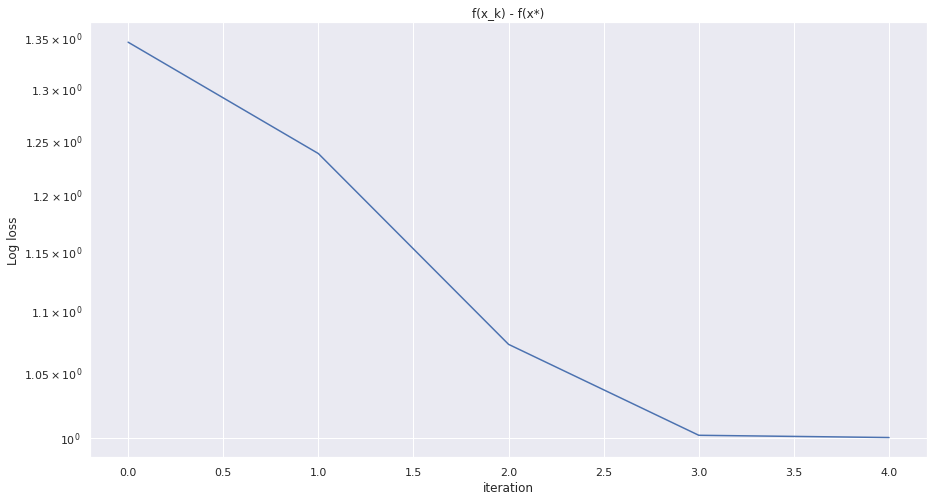

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.semilogy(ydata)
plt.title('f(x_k) - f(x*)')
plt.xlabel('iteration')
plt.ylabel('Log loss')

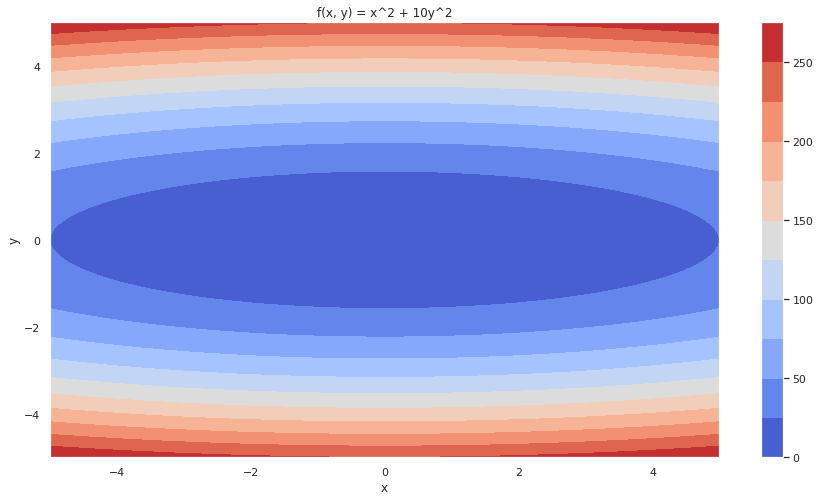

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
xlist = np.linspace(-5.0, 5.0, 100)
ylist = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = X**2 + 10*Y**2

cp = plt.contourf(X, Y, Z, 10, cmap = 'coolwarm')
plt.colorbar(cp, cmap = 'coolwarm')
plt.title('f(x, y) = x^2 + 10y^2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
!pip install autograd

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

In [ ]:
f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [ ]:
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)

In [ ]:
# It is known
minima = np.array([3., .5])

In [ ]:
f(*minima)

0.0

In [ ]:
minima_ = minima.reshape(-1, 1)
minima_

array([[3. ],
       [0.5]])

In [ ]:
f(*minima_)

array([0.])

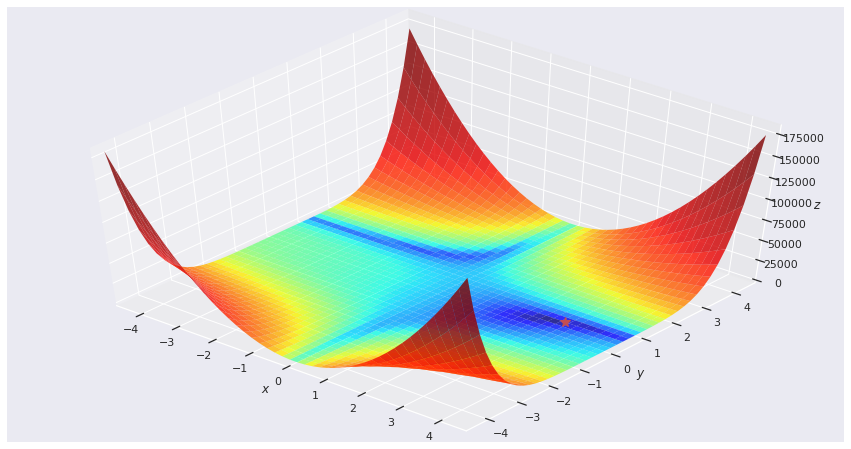

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

In [ ]:
x0 = np.array([1., -3.])

In [ ]:
func = value_and_grad(lambda args: f(*args))

In [ ]:
res = minimize(func, x0=x0, method='BFGS',
               jac=True, tol=1e-20, callback=print)

[ 0.26169155 -2.31079711]
[ 0.16181111 -2.41543177]
[ 0.12428932 -2.45726361]
[ 0.12301307 -2.45851716]
[ 0.12316645 -2.45814862]
[ 0.12414512 -2.454845  ]
[ 0.12565349 -2.44854074]
[0.67300726 0.12936225]
[0.66947298 0.11256824]
[0.88761687 0.23248483]
[1.27171157 0.19775867]
[2.1455921  0.03555492]
[2.23404917 0.19351201]
[2.53774447 0.42559427]
[2.60629388 0.38085757]
[2.73569183 0.42143378]
[2.89305622 0.47863871]
[2.95148437 0.48856771]
[2.99180967 0.49846504]
[2.99890556 0.4996404 ]
[3.00014956 0.50005237]
[2.99999946 0.49999984]
[3.  0.5]
[3.  0.5]
[3.  0.5]
[3.  0.5]


In [ ]:
dict(res)

{'fun': 0.0, 'hess_inv': array([[3.1178472 , 0.77289684],
        [0.77289684, 0.21326821]]), 'jac': array([0., 0.]), 'message': 'Optimization terminated successfully.', 'nfev': 47, 'nit': 26, 'njev': 47, 'status': 0, 'success': True, 'x': array([3. , 0.5])}

In [ ]:
def make_minimize_cb(path=[]):
    
    def minimize_cb(xk):
        # note that we make a deep copy of xk
        path.append(np.copy(xk))

    return minimize_cb

path_ = [x0]

res = minimize(func, x0=x0, method='Newton-CG',
               jac=True, tol=1e-20, callback=make_minimize_cb(path_))
dict(res)

{'fun': 5.119632425893594e-17,
 'jac': array([5.06560003e-09, 2.64302154e-09]),
 'message': 'Optimization terminated successfully.',
 'nfev': 30,
 'nhev': 0,
 'nit': 21,
 'njev': 116,
 'status': 0,
 'success': True,
 'x': array([3.00000002, 0.5       ])}

In [ ]:
path = np.array(path_).T
path.shape

(2, 22)

(-4.5, 4.5)

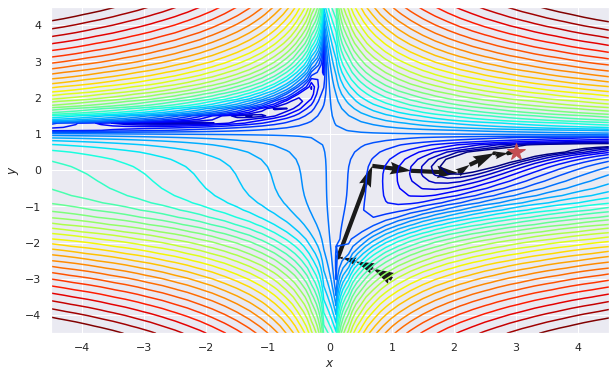

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

### Comparison with gradient descent convergence

In [ ]:
import numpy as np

USE_COLAB = True
if USE_COLAB:
    !pip install git+https://github.com/amkatrutsa/liboptpy
        
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss

n = 1000
m = 200
x0 = np.zeros((n,))
A = np.random.rand(n, m) * 10

import cvxpy as cvx
x = cvx.Variable((n, 1))

obj = cvx.Minimize(cvx.sum(-cvx.log(1 - A.T * x)) - 
                   cvx.sum(cvx.log(1 - cvx.square(x))))
prob = cvx.Problem(obj)
prob.solve(solver="SCS", verbose=True, max_iters=1000)
print("Optimal value =", prob.value)

  Cloning https://github.com/amkatrutsa/liboptpy to /tmp/pip-req-build-814aiqic
  Running command git clone -q https://github.com/amkatrutsa/liboptpy /tmp/pip-req-build-814aiqic
  Created wheel for liboptpy: filename=liboptpy-0.0.1-cp36-none-any.whl size=12848 sha256=1a413ad56474cec2902a4b0adc4d3736a026db72d4b15322a2f9b73eeecee2d7
  Stored in directory: /tmp/pip-ephem-wheel-cache-qr3_psbc/wheels/8e/6e/38/60496dcf12f2c341e42d932d1403bdaaa17049556fdaba8d40
Successfully built liboptpy
----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 205200
eps = 1.00e-04, alpha = 1.50, max_iters = 1000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 3200, constraints m = 6600
Cones:	soc vars: 3000, soc blks: 1000
	exp vars: 3600, dual exp var

In [ ]:
f = lambda x: -np.sum(np.log(1 - A.T.dot(x))) - np.sum(np.log(1 - x*x))
grad_f = lambda x: np.sum(A.dot(np.diagflat(1 / (1 - A.T.dot(x)))), axis=1) + 2 * x / (1 - np.power(x, 2))
hess_f = lambda x: (A.dot(np.diagflat(1 / (1 - A.T.dot(x))**2))).dot(A.T) + np.diagflat(2 * (1 + x**2) / (1 - x**2)**2)

In [ ]:
def Newton(f, gradf, hessf, x0, epsilon, num_iter, line_search, 
                    disp=False, callback=None, **kwargs):
    x = x0.copy()
    iteration = 0
    opt_arg = {"f": f, "grad_f": gradf}
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:
        gradient = gradf(x)
        hess = hessf(x)
        h = np.linalg.solve(hess, -gradient)
        alpha = line_search(x, h, **opt_arg)
        x = x + alpha * h
        if callback is not None:
            callback(x)
        iteration += 1
        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x))}
    return res

In [ ]:
newton = methods.so.NewtonMethod(f, grad_f, hess_f, ss.Backtracking("Armijo", rho=0.9, beta=0.1, init_alpha=1.))
x_newton = newton.solve(x0, tol=1e-6, max_iter=50, disp=True)

gd = methods.fo.GradientDescent(f, grad_f, ss.Backtracking("Armijo", rho=0.9, beta=0.1, init_alpha=1.))
x_gd = gd.solve(x0, tol=1e-6, max_iter=50, disp=True)

Required tolerance achieved!
Convergence in 14 iterations
Function value = -1368.4366971843606
Norm of gradient = 7.381991022016933e-10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


Required tolerance achieved!
Convergence in 46 iterations
Function value = -1368.4366971843608
Norm of gradient = 1.7242562599100684e-07


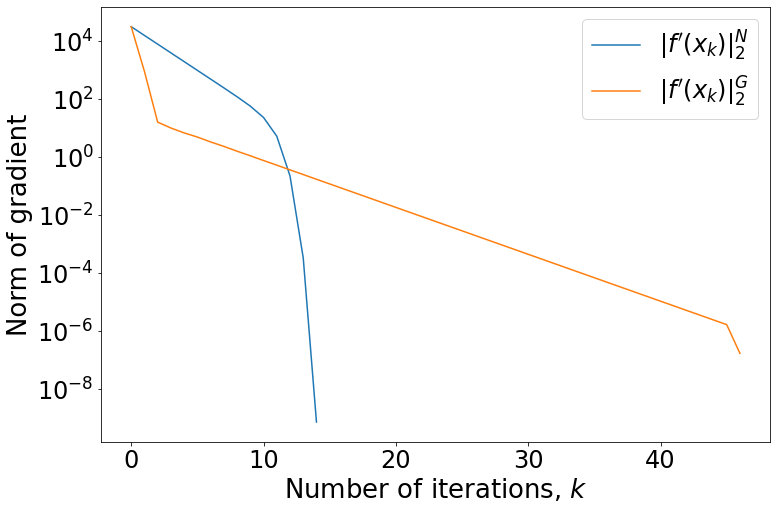

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

if not USE_COLAB:
    plt.rc("text", usetex=True)
    
plt.figure(figsize=(12, 8))
# Newton
plt.semilogy([np.linalg.norm(grad_f(x)) for x in newton.get_convergence()], label="$\| f'(x_k) \|^{N}_2$")
# Gradient
plt.semilogy([np.linalg.norm(grad_f(x)) for x in gd.get_convergence()], label="$\| f'(x_k) \|^{G}_2$")
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel(r"Norm of gradient", fontsize=26)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.legend(loc="best", fontsize=24)

## Quasi Newton methods
[source](https://github.com/amkatrutsa/MIPT-Opt/blob/master/Spring2020/newton_quasi.ipynb) 

### Analytical center

Consider the unconstrained problem:

$$
f(x) = - \sum_{i=1}^m \log(1 - a_i^{\top}x) - \sum\limits_{i = 1}^n \log (1 - x^2_i) \to \min_{x \in \mathbb{R}^n}
$$

with variable $x \in \mathbb{R}^n$, and $\text{dom} f = \{x \mid a_i^{\top}x < 1, i = 1, \ldots , m, \quad |x_i| < 1, i = 1, \ldots , n\}$.
This is the problem of computing the analytic center of the set of linear inequalities:

$$
a_i^{\top}x < 1, \;\; i = 1,\ldots, m, \qquad |x_i| < 1, \;\; i = 1, \ldots, n
$$

Note that we can choose $x_0 = 0$ as our initial point. You can generate instances of this problem by choosing ai from some distribution on $\mathbb{R}^n$.

In [ ]:
import numpy as np
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.optimize as scopt

In [ ]:
n = 3000
m = 100
x0 = np.zeros(n)
max_iter = 100
tol = 1e-5
A = np.random.rand(m, n) * 10

In [ ]:
f = lambda x: -np.sum(np.log(1 - A.dot(x))) - np.sum(np.log(1 - x*x))
grad_f = lambda x: np.sum(A.T / (1 - A.dot(x)), axis=1) + 2 * x / (1 - np.power(x, 2))

In [ ]:
def bb_method(f, gradf, x0, tol=1e-6, maxiter=100, callback=None, alpha_type=1):
    it = 0
    x_prev = x0.copy()
    current_tol = np.linalg.norm(gradf(x_prev))
    alpha = 1e-4
    while current_tol > tol and it < maxiter:
        it += 1
        current_grad = gradf(x_prev)
        if it != 1:
            g = current_grad - prev_grad
            if alpha_type == 1:
                alpha = g.dot(s) / g.dot(g)
            elif alpha_type == 2:
                alpha = s.dot(s) / g.dot(s)
        if callback:
            callback(x_prev)
        x_next = x_prev - alpha * current_grad
        current_tol = np.linalg.norm(gradf(x_next))
        prev_grad = current_grad
        s = x_next - x_prev
        x_prev = x_next
    if callback:
        callback(x_prev)
    return x_next

In [ ]:
method = {
    "BB 1": methods.fo.BarzilaiBorweinMethod(f, grad_f, init_alpha=1e-4, type=1),
    "BFGS": methods.fo.BFGS(f, grad_f),
    "DFP": methods.fo.DFP(f, grad_f),
    "LBFGS": methods.fo.LBFGS(f, grad_f),
}

In [ ]:
for m in method:
    print("\t Method {}".format(m))
    _ = method[m].solve(x0=x0, tol=tol, max_iter=max_iter, disp=True)

print("\t Method BFGS Scipy")
scopt_conv = []
scopt_res = scopt.minimize(f, x0, method="BFGS", jac=grad_f, callback=lambda x: scopt_conv.append(x), 
                           tol=tol, options={"maxiter": max_iter})
print("Result: {}".format(scopt_res.message))
if scopt_res.success:
    print("Convergence in {} iterations".format(scopt_res.nit))
print("Function value = {}".format(f(scopt_res.x)))

	 Method BB 1
Required tolerance achieved!
Convergence in 10 iterations
Function value = -706.5498421894205
Norm of gradient = 5.349647955915332e-06
	 Method BFGS


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


Required tolerance achieved!
Convergence in 24 iterations
Function value = -706.5498421894129
Norm of gradient = 6.855565262883054e-06
	 Method DFP
Maximum iteration exceeds!
Convergence in 100 iterations
Function value = -706.5494721716166
Norm of gradient = 0.05152188974082583
	 Method LBFGS
Required tolerance achieved!
Convergence in 14 iterations
Function value = -706.5498421894204
Norm of gradient = 3.981053143784541e-06
	 Method BFGS Scipy
Result: Optimization terminated successfully.
Convergence in 16 iterations
Function value = -706.5498421891011


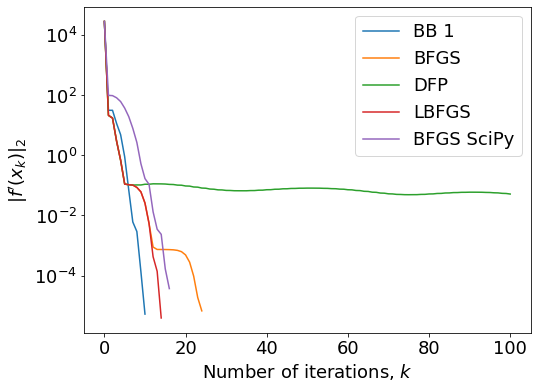

In [ ]:
plt.figure(figsize=(8, 6))

for m in method:
    plt.semilogy([np.linalg.norm(grad_f(x)) for x in method[m].get_convergence()], label=m)

plt.semilogy([np.linalg.norm(grad_f(x)) for x in [x0] + scopt_conv], label="BFGS SciPy")
plt.ylabel("$\|f'(x_k)\|_2$", fontsize=18)
plt.xlabel("Number of iterations, $k$", fontsize=18)
plt.legend(fontsize=18)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

In [ ]:
for m in method:
    print("\t Method {}".format(m))
    %timeit method[m].solve(x0=x0, tol=tol, max_iter=max_iter)

%timeit scopt.minimize(f, x0, method="BFGS", jac=grad_f, tol=tol, options={"maxiter": max_iter})

	 Method BB 1
100 loops, best of 3: 13.7 ms per loop
	 Method BFGS


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


1 loop, best of 3: 5.25 s per loop
	 Method DFP


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


1 loop, best of 3: 13 s per loop
	 Method LBFGS


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


10 loops, best of 3: 136 ms per loop
1 loop, best of 3: 49.8 s per loop


### Ill-conditioned linear system

In [ ]:
n = 50
D = np.arange(1, n+1)
U = np.random.randn(n, n)
U, _ = np.linalg.qr(U)
A = U.dot(np.diag(D)).dot(U.T)
b = np.random.randn(n)
eig_vals = np.linalg.eigvals(A)
print("Condition number = {}".format(np.max(eig_vals) / np.min(eig_vals)))

Condition number = 49.99999999999879


In [ ]:
f = lambda x: 0.5 * x.T.dot(A.dot(x)) - b.dot(x)
gradf = lambda x: A.dot(x) - b
x0 = np.random.randn(n)

In [ ]:
method = {
    "BB 1": methods.fo.BarzilaiBorweinMethod(f, gradf, init_alpha=1e-4, type=1),
    "BB 2": methods.fo.BarzilaiBorweinMethod(f, gradf, init_alpha=1e-4, type=2),
    "BFGS": methods.fo.BFGS(f, gradf),
    "DFP": methods.fo.DFP(f, gradf),
    "GD": methods.fo.GradientDescent(f, gradf, ss.ExactLineSearch4Quad(A, b)),
    "LBFGS": methods.fo.LBFGS(f, gradf, hist_size=10),
}

In [ ]:
for m in method:
    print("\t Method {}".format(m))
    _ = method[m].solve(x0=x0, tol=tol, max_iter=max_iter, disp=True)

print("\t Method BFGS Scipy")

scopt_conv = []
scopt_res = scopt.minimize(f, x0, method="BFGS", jac=gradf, callback=lambda x: scopt_conv.append(x), 
                           tol=tol, options={"maxiter": max_iter})
print("Result: {}".format(scopt_res.message))
if scopt_res.success:
    print("Convergence in {} iterations".format(scopt_res.nit))
print("Function value = {}".format(f(scopt_res.x)))

print("\t Method L-BFGS Scipy")

scopt_lbfgs_conv = []
scopt_res = scopt.minimize(f, x0, method="L-BFGS-B", jac=gradf, tol=tol, 
                           options={"maxiter": max_iter, 'maxcor': 10, "ftol": 1e-10, "gtol": 1e-6},
                           callback=lambda x: scopt_lbfgs_conv.append(x),
                           )
print("Result: {}".format(scopt_res.message))
if scopt_res.success:
    print("Convergence in {} iterations".format(scopt_res.nit))
print("Function value = {}".format(f(scopt_res.x)))

	 Method BB 1
Required tolerance achieved!
Convergence in 61 iterations
Function value = -2.295939525010034
Norm of gradient = 9.894730436306648e-06
	 Method BB 2
Required tolerance achieved!
Convergence in 61 iterations
Function value = -2.2959395250499366
Norm of gradient = 6.080438850772609e-06
	 Method BFGS
Required tolerance achieved!
Convergence in 46 iterations
Function value = -2.295939525053618
Norm of gradient = 9.37591825251349e-06
	 Method DFP
Required tolerance achieved!
Convergence in 94 iterations
Function value = -2.2959395250538384
Norm of gradient = 6.7342344771832965e-06
	 Method GD
Maximum iteration exceeds!
Convergence in 100 iterations
Function value = -2.295937456619326
Norm of gradient = 0.0028971279348261876
	 Method LBFGS
Required tolerance achieved!
Convergence in 44 iterations
Function value = -2.2959395250334835
Norm of gradient = 9.89422958724675e-06
	 Method BFGS Scipy
Result: Optimization terminated successfully.
Convergence in 59 iterations
Function val

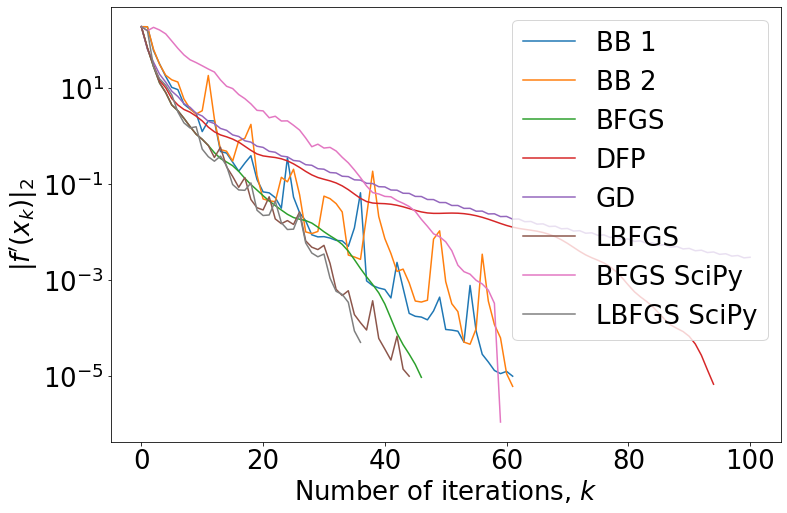

In [ ]:
plt.figure(figsize=(12, 8))
fontsize = 26
for m in method:   
    plt.semilogy([np.linalg.norm(gradf(x)) for x in method[m].get_convergence()], label=m)

plt.semilogy([np.linalg.norm(gradf(x)) for x in [x0] + scopt_conv], label='BFGS SciPy')

plt.semilogy([np.linalg.norm(gradf(x)) for x in [x0] + scopt_lbfgs_conv], label='LBFGS SciPy')
plt.legend(fontsize=fontsize)
plt.ylabel("$\|f'(x_k)\|_2$", fontsize=fontsize)
plt.xlabel("Number of iterations, $k$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

In [ ]:
for m in method:
    print("\t Method {}".format(m))
    %timeit method[m].solve(x0=x0, tol=tol, max_iter=max_iter)

%timeit scopt.minimize(f, x0, method="BFGS", jac=gradf, tol=tol, options={"maxiter": max_iter})
%timeit scopt.minimize(f, x0, method="L-BFGS-B", jac=gradf, tol=tol, options={"maxiter": max_iter, 'maxcor': 10, "ftol": 1e-10, "gtol": 1e-6})

	 Method BB 1
The slowest run took 6.49 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 1.17 ms per loop
	 Method BB 2
1000 loops, best of 3: 1.16 ms per loop
	 Method BFGS
100 loops, best of 3: 5.09 ms per loop
	 Method DFP
100 loops, best of 3: 8.96 ms per loop
	 Method GD
100 loops, best of 3: 2.12 ms per loop
	 Method LBFGS
100 loops, best of 3: 6.12 ms per loop
100 loops, best of 3: 9.05 ms per loop
1000 loops, best of 3: 1.3 ms per loop


# Exercises

## Task 1: Hobbit's village (Part II)

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import copy
sns.set()

Below one can find function plotting the village

In [ ]:
def plot_village(coordinates, l=1):
    # Checking, that all the coordinates are less than l
    assert (coordinates <= l).all(), 'All the houses should be in a village'
    
    # Draw horizontal line
    plt.hlines(0, 0, l)
    plt.xlim(0, l)
    plt.ylim(-0.5, 0.5)
    
    # Draw house points
    y = np.zeros(np.shape(coordinates))
    plt.title('The Hobbit Village')
    plt.plot(coordinates,y,'o',ms = 10)
    plt.axis('off')
    plt.xlabel('Coordinates')
    fig = plt.gcf()
    fig.set_size_inches(15, 1)
    plt.show()

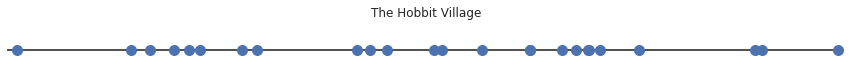

In [ ]:
N = 25
l = 1
x = np.random.rand(N)*l
    
plot_village(x, l)

We have same loss function

$$
P(w, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p(|w - x_i|),
$$

where $p(d) = d^2$

Write functions `P, dP, ddP`. `ddP` has to return hessian of loss function

In [ ]:
def P(w, x):
    ### YOUR CODE
    return

def dP(w, x):
    ### YOUR CODE
    return 

def ddP(w, x):
    ### YOUR CODE
    return 

Plot `ddP` on the range  (0,l)

In [ ]:
### YOUR CODE

Write function `newton_descent`, which return all optimization trajectory. Update rule:

$$
w_{i+1} = w_{i} - \nabla^{2} f\left(w_{i}\right)^{-1} \nabla f\left(w_{i}\right)
$$

In [ ]:
def newton_descent(x, dP, ddP, w0, Nsteps):
    ### YOUR CODE
    return trajectory

Investigate the behavior of Newton's method depending on the different initial point $w_0$.

In [ ]:
### YOUR CODE

Write function `multi_newton`, which solve 2D task:
$$
P(w_1, w_2, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p\left(\min\left(\left|w_1 - x_i\right|, \left|w_2 - x_i\right|\right)\right)
$$

with  $p(d) = d^3$ using Newton method and return optimization trajectory. Compare results with gradient descent.

In [ ]:
def P(w1, w2, x):
    ### YOUR CODE
    return 

def dP(w1, w2, x):
    ### YOUR CODE
    return 

def ddP(w1, w2, x):
    ### YOUR CODE
    return 

In [ ]:
def multi_newton(x, dP, ddP, w0, Nsteps):
    ### YOUR CODE
    return trajectory

In [ ]:
### Gradient descent trajectory

In [ ]:
### Newton descent trajectory

## Task 2

Consider the following problem:

$$
\begin{split} & f(x) \to \min\limits_{x \in \mathbb{R}^{n} } \\ 
\text{s.t. } & h(x) = 0 \\
 & g(x) \leqslant 0
\end{split}
$$

Let's use following approximations:
$$
f(x) \approx f(x_k) + \nabla f(x_k)^T (x-x_k) + \frac{1}{2} (x-x_k)^T \nabla^2f(x_k) (x-x_k)
$$

$$
g(x) \approx g(x_k) + \nabla g(x_k)^T (x-x_k)
$$

$$
h(x) \approx h(x_k) + \nabla h(x_k)^T (x-x_k)
$$

Let's define $d := (x-x_k)$ and rewrite our problem

$$
\begin{split} & f(x_k) + \nabla f(x_k)^T d + \frac{1}{2} d^T \nabla^2f(x_k)d \to \min\limits_{d \in \mathbb{R}^{n} } \\ 
\text{s.t. } & h(x_k) + \nabla h(x_k)^Td = 0 \\
 & g(x_k) + \nabla g(x_k)^Td \leqslant 0
\end{split}
$$

Now instead of arbitrary optimization problem we optimize Quadratic programming problem with linear constraints. This method called [Sequential quadratic programming](https://www.math.uh.edu/~rohop/fall_06/Chapter4.pdf). We reduce our problem to sequence of quadratic problems, which we can easily solve. Moreover, If there are no constraints, SQP reduces to Newton method.

Consider the following problem:

$$
\begin{split} & exp(x_1)(a_1x_1^2 + a_2x_2^2+a_3x_1x_2+a_4x_2 + a_5) \to \min\limits_{x \in \mathbb{R}^{n} } \\ 
\text{s.t. } & x_1^2 + x_2 - b = 0
\end{split}
$$

Implement one step of SQP algorithm for abovementioned problem

In [ ]:
a = [4, 2, 4, 2, 1]
b = 1
### YOUR CODE

After we have found minimizing direction, we have to define step-size for gradient descent. For this purpose we will use [backtracking line search](http://web.mit.edu/6.252/www/LectureNotes/6_252%20Lecture04.pdf). Your task is to implement it.

In [ ]:
def line_search(d, alpha=0.2):
    ### YOUR CODE
    return t

As we implemented all necessary stuff for SQP, we can put it all together

In [ ]:
class SQPSolver:
    def __init__(self, func, cons_f):
        ### YOUR CODE
        pass

    def _line_search(self, d):
        ### YOUR CODE
        pass

    def _solve_step(self):
        ### YOUR CODE
        pass

    def solve(self):
        ### YOUR CODE
        pass

In [ ]:
### Solving
...

Compare your method with `scipy.optimize.minimize(method='SLSQP')`

In [ ]:
### YOUR CODE